In [1]:
from SimPEG import *

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [69]:
cs = 25.
hx = [(cs,7, -1.3),(cs,21),(cs,7, 1.3)]
hy = [(cs,7, -1.3),(cs,21),(cs,7, 1.3)]
hz = [(cs,7, -1.3),(cs,20)]

In [72]:
mesh = Mesh.TensorMesh([hx, hy, hz], "CCN")
sigma = np.ones(mesh.nC)

In [79]:
print mesh

  ---- 3-D TensorMesh ----  
   x0: -833.94
   y0: -833.94
   z0: -1071.44
  nCx: 35
  nCy: 35
  nCz: 27
   hx: 156.87, 120.67, 92.82, 71.40, 54.93, 42.25, 32.50, 21*25.00, 32.50, 42.25, 54.93, 71.40, 92.82, 120.67, 156.87
   hy: 156.87, 120.67, 92.82, 71.40, 54.93, 42.25, 32.50, 21*25.00, 32.50, 42.25, 54.93, 71.40, 92.82, 120.67, 156.87
   hz: 156.87, 120.67, 92.82, 71.40, 54.93, 42.25, 32.50, 20*25.00


In [81]:
mesh.nC

33075

In [82]:
Div = mesh.faceDiv

In [83]:
mesh.setCellGradBC("neumann")

[['neumann', 'neumann'], ['neumann', 'neumann'], ['neumann', 'neumann']]

In [84]:
Grad = mesh.cellGrad

In [101]:
Afc = mesh.aveF2CC
Msig = Utils.sdiag(1./(Afc.T*(1./sigma)))

In [102]:
A = Div*Msig*Grad

In [103]:
# A[-1, -1] / mesh.vol[-1]

In [104]:
A[0,0] /= mesh.vol[0]

In [105]:
inds = Utils.closestPoints(mesh, np.r_[0., 0., 0.])

In [106]:
q = np.zeros(mesh.nC)
q[inds] = 1.

In [109]:
from pymatsolver import MumpsSolver

In [110]:
Ainv = MumpsSolver(A)

In [111]:
phi = Ainv*q

In [115]:
mesh.vectorCCz.shape

(27,)

(<matplotlib.collections.QuadMesh at 0x10e663790>,
 <matplotlib.lines.Line2D at 0x10e663c10>)

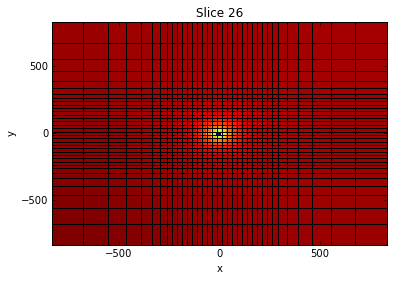

In [117]:
mesh.plotSlice(phi,ind=26, grid=True)

In [120]:
xyzM = Utils.ndgrid(mesh.vectorCCx+5., mesh.vectorCCy, np.r_[0.])
xyzN = Utils.ndgrid(mesh.vectorCCx-5., mesh.vectorCCy, np.r_[0.])

In [123]:
PM = mesh.getInterpolationMat(xyzM, "CC")
PN = mesh.getInterpolationMat(xyzN, "CC")

In [ ]:
PM = mesh.getInterpolationMat

In [124]:
data = PM*phi-PN*phi

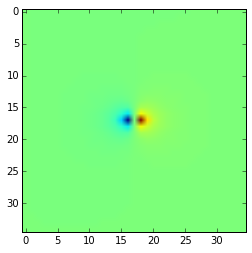

In [126]:
plt.imshow(data.reshape(mesh.nCx, mesh.nCy))